In [ ]:

#!/usr/bin/env python
# coding: utf-8

In[1]:

mport Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In[2]:

read Dataset

In [ ]:
df_train=pd.read_csv("Google_Stock_Price_Train.csv")
df_train.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In[3]:

eras only takes numpy array<br>
ill use Open price for prediction so we need to make it NumPy array

In [ ]:
training_set = df_train.iloc[:, 1: 2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In[4]:

cale the stock prices between (0, 1) to avoid intensive computation.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In[5]:

In [ ]:
x_train= training_set[0:1257]
y_train= training_set[1:1258]
display(x_train.shape,  y_train.shape)

(1257, 1)

(1257, 1)

In[6]:

In [ ]:
x_train=np.reshape(x_train, (1257 , 1 , 1))

In[7]:

In [ ]:
x_train.shape

(1257, 1, 1)

In[8]:

In [ ]:
df_test=pd.read_csv("Google_Stock_Price_Test.csv")
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In[9]:

Text(0.5, 1.0, 'Sales Open')

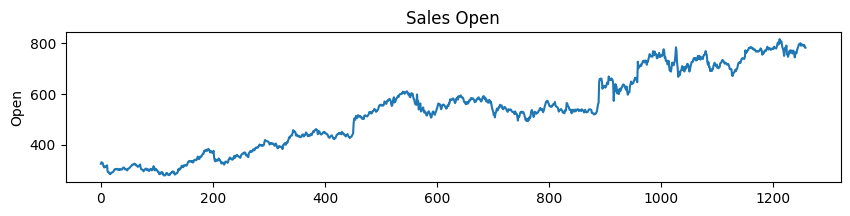

In [ ]:
figure=plt.figure(figsize=(10,10))
plt.subplots_adjust(top=1.35, bottom=1.2)
df_train['Open'].plot()
plt.ylabel('Open')
plt.xlabel(None)
plt.title(f"Sales Open")

In[10]:

In [ ]:
testing_set = df_test.iloc[:, 1: 2].values
testing_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In[11]:

In [ ]:
testing_set=sc.fit_transform(testing_set)
testing_set.shape

(20, 1)

In[17]:

In [ ]:
x_test= testing_set[0:20]
y_test= testing_set[0:20]
#display(x_test,  y_test)
y_test.shape

(20, 1)

In[18]:

In [ ]:
x_test=np.reshape(x_test, (20 , 1 , 1))

In[19]:

In [ ]:
x_test.shape

(20, 1, 1)

In[20]:

In [ ]:
import tensorflow.keras as tk

In[32]:

In [ ]:
model = tk.Sequential()

In [ ]:
model.add(tk.layers.LSTM(units=5, activation= 'sigmoid', input_shape= (None,1)))

In [ ]:
model.add(tk.layers.Dense( units=1 ))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
40/40 [==============================] - 2s 10ms/step - loss: 0.0710 - val_loss: 0.0535
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0675 - val_loss: 0.0519
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0655 - val_loss: 0.0504
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.0488
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.0471
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0594 - val_loss: 0.0454
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0571 - val_loss: 0.0436
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0548 - val_loss: 0.0417
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0523 - val_loss: 0.0398
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.0377
Epoch 11/50
40/40 

In[33]:

In [ ]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 172ms/step


In[34]:

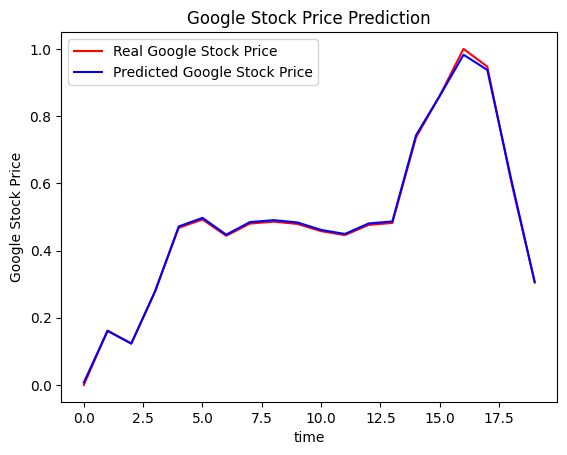

In [ ]:
plt.plot( y_test , color = 'red' , label = 'Real Google Stock Price')
plt.plot( y_pred , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

In[ ]: